In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [31]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [213]:
from config import data_dir, reports_dir
#from ploting_routines import *
from analysis_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [33]:
station7 = load_time_series_xr('station7_complete.nc')

In [35]:
station7

<xarray.Dataset>
Dimensions:  (date: 259, pres: 2647)
Coordinates:
  * date     (date) datetime64[ns] 1994-08-12T12:00:00 ... 2021-01-29T16:11:16
  * pres     (pres) int32 1 2 3 4 5 6 7 8 ... 2641 2642 2643 2644 2645 2646 2647
Data variables:
    lat      (date) float32 ...
    lon      (date) float32 ...
    temp     (date, pres) float64 ...
    sal      (date, pres) float64 ...
Attributes:
    title:    Station 7 CTD temperature

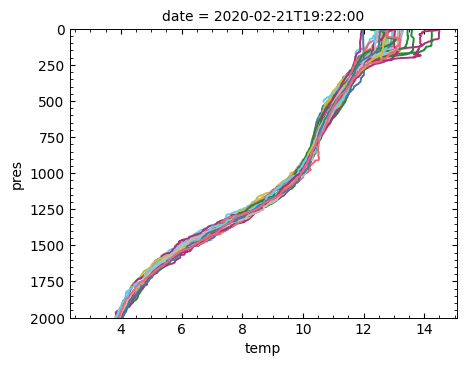

In [20]:
jan = station7.temp.where(station7.date.dt.month.isin([1]), drop=True)
for i in range(len(jan.date)):
    jan[i].plot(y='pres', ylim=(2000, 0))


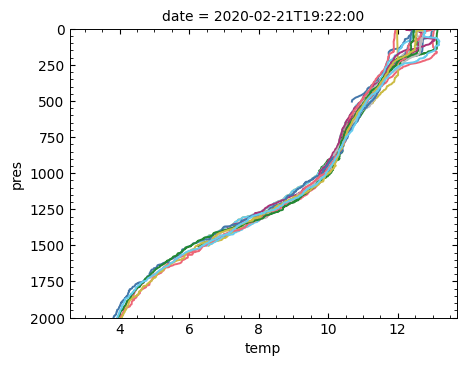

In [21]:
feb = station7.temp.where(station7.date.dt.month.isin([2]), drop=True)
for i in range(len(feb.date)):
    feb[i].plot(y='pres', ylim=(2000, 0))

[9, 4, 7, 0, 12, 5, 5]


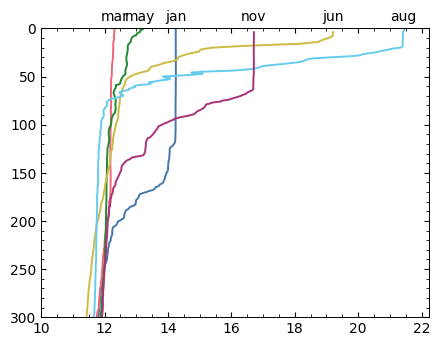

In [140]:

jan = station7.temp.where(station7.date.dt.month.isin([1]), drop=True)
feb = station7.temp.where(station7.date.dt.month.isin([2]), drop=True)
march = station7.temp.where(station7.date.dt.month.isin([3]), drop=True)
apr = station7.temp.where(station7.date.dt.month.isin([4]), drop=True)
may = station7.temp.where(station7.date.dt.month.isin([5]), drop=True)
jun = station7.temp.where(station7.date.dt.month.isin([6]), drop=True)
jul = station7.temp.where(station7.date.dt.month.isin([7]), drop=True)
aug = station7.temp.where(station7.date.dt.month.isin([8]), drop=True)
sept = station7.temp.where(station7.date.dt.month.isin([9]), drop=True)
octo = station7.temp.where(station7.date.dt.month.isin([10]), drop=True)
nov = station7.temp.where(station7.date.dt.month.isin([11]), drop=True)
dec = station7.temp.where(station7.date.dt.month.isin([11]), drop=True)

#[11  7  5 11  2  3  6]
#[6 6 9 6 5 6 8]
#[3 6 3 6 9 7 5]
random_int = [11, 13,  0,  2, 10,  2,  8]
random_int = [9,  4,  7, 0, 12,  5,  5]
fig, ax = plt.subplots()
#random_int = np.random.randint(0, 14, 7)
ax.plot(jan[random_int[0]], station7.pres)
ax.text(jan[random_int[0]][3], -8, 'jan', ha='center')

ax.plot(march[random_int[1]], station7.pres)
ax.text(march[random_int[1]][3], -8, 'mar', ha='center')

ax.plot(may[random_int[2]], station7.pres)
ax.text(may[random_int[2]][3], -8, 'may', ha='center')

ax.plot(jun[random_int[3]], station7.pres)
ax.text(jun[random_int[3]][3], -8, 'jun', ha='center')


ax.plot(aug[random_int[4]], station7.pres)
ax.text(aug[random_int[4]][3], -8, 'aug', ha='center')


#ax.plot(sept[random_int[5]], station7.pres)
#ax.text(sept[random_int[5]][3], -8, 'sept', ha='center')

ax.plot(nov[random_int[6]], station7.pres)
ax.text(nov[random_int[6]][3], -8, 'nov', ha='center')

ax.set_ylim(300, 0)
ax.set_xlim(10, None)
print(random_int)

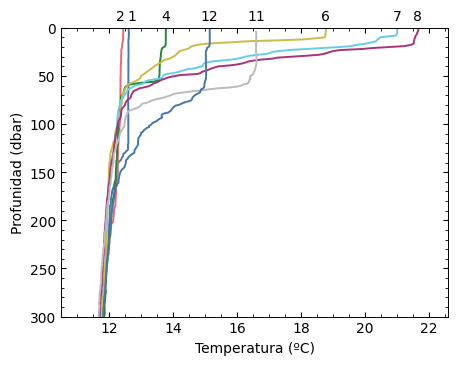

In [219]:
fig, ax = plt.subplots()
year = station7.temp.sel(date='2014')
months_int = [0, 1, 3, 5, 6, 7, 10, 11]
for i in months_int:
    #k = i*2 + 1
    ax.plot(year[i], station7.pres)
    if i==0:
        ax.text(year[i][np.isfinite(year[i])][3] +0.1, -8, i + 1, ha='center')
    elif i==1:
        ax.text(year[i][np.isfinite(year[i])][3] -0.1, -8, i + 1, ha='center')     
    else:
        ax.text(year[i][np.isfinite(year[i])][3], -8, i + 1, ha='center')
ax.set_ylim(300, 0)
ax.set_xlim(10.5, None)
ax.set_xlabel('Temperatura (ºC)')
ax.set_ylabel('Profunidad (dbar)')
fig.savefig(reports_dir / 'figures/profiles_2014.pdf')
plt.show()



In [123]:
station7.t.plot(y='pres', ylim=(2000, 0))

AttributeError: 'Dataset' object has no attribute 't'

In [7]:
temp, pres, date = load_time_series('unprocessed/station7_more_profiles.nc')
df_fit = load_SHDR_fit('station7_more_profiles_fit.csv')
print(mean_and_std(df_fit, 'b3'))

(-0.002519943181451789, 0.0007847012832542088)


In [10]:
print(df_fit.loc[[0, 1, 2, 3, len(df_fit) - 2, len(df_fit) - 4, len(df_fit) - 6], ['b3']])

          b3
0  -0.001963
1  -0.002138
2  -0.002673
3  -0.001112
62 -0.002280
60 -0.002866
58 -0.002332


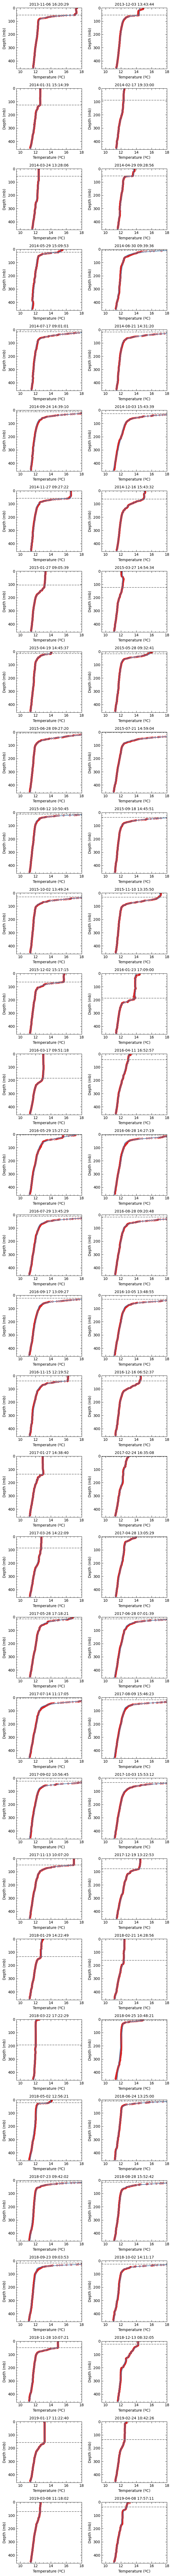

In [9]:
plot_multiple_profiles(df_fit, temp, pres, range(len(date)))

In [8]:
i_0 = date_to_idx(date, datetime(2020, 5, 31, 18))
i_f = date_to_idx(date, datetime(2020, 10, 2, 18))


KeyboardInterrupt: 

In [9]:
print(date)

[datetime.datetime(2013, 11, 6, 15, 20, 29)
 datetime.datetime(2013, 12, 3, 12, 43, 44)
 datetime.datetime(2014, 1, 31, 14, 14, 39)
 datetime.datetime(2014, 2, 17, 18, 33)
 datetime.datetime(2014, 3, 24, 12, 28, 6)
 datetime.datetime(2014, 4, 29, 7, 28, 56)
 datetime.datetime(2014, 5, 29, 13, 9, 53)
 datetime.datetime(2014, 6, 30, 7, 39, 36)
 datetime.datetime(2014, 7, 17, 7, 1, 1)
 datetime.datetime(2014, 8, 21, 12, 31, 20)
 datetime.datetime(2014, 9, 24, 12, 39, 10)
 datetime.datetime(2014, 10, 3, 13, 43, 39)
 datetime.datetime(2014, 11, 27, 8, 27, 22)
 datetime.datetime(2014, 12, 16, 14, 43, 32)
 datetime.datetime(2015, 1, 27, 8, 5, 39)
 datetime.datetime(2015, 3, 27, 13, 54, 34)
 datetime.datetime(2015, 4, 19, 12, 45, 37)
 datetime.datetime(2015, 5, 28, 7, 32, 41)
 datetime.datetime(2015, 6, 28, 7, 27, 20)
 datetime.datetime(2015, 7, 21, 12, 59, 4)
 datetime.datetime(2015, 8, 12, 8, 50, 45)
 datetime.datetime(2015, 9, 18, 12, 45, 51)
 datetime.datetime(2015, 10, 2, 11, 49, 24)
 dat